<a href="https://colab.research.google.com/github/abhishek1959/Object-Detection-Using-YOLOV8/blob/main/object_detection_using_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Oct 24 15:35:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

In [ ]:
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                32.3/112.6 GB
CPU                 Intel Xeon 2.00GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 10.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.0+cu121>=1.8.0
torchvision         ✅ 0.20.0+cu121>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.2.2>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0
ultralytic

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

##Code running using CLI

In [36]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/image5.jpg'

/content
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/image5.jpg: 448x640 1 cat, 44.6ms
Speed: 2.4ms preprocess, 44.6ms inference, 518.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


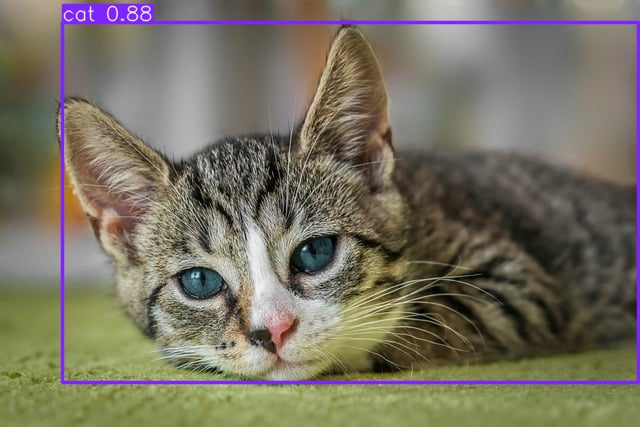

In [38]:
%cd {HOME}
Image(filename='runs/detect/predict5/image5.jpg', height=600)

##Code running using Python SDK

In [39]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='/content/image5.jpg', conf=0.25)


image 1/1 /content/image5.jpg: 448x640 1 cat, 8.9ms
Speed: 2.2ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


##Preparing a custom dataset

In [40]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("model-examples").project("football-players-obj-detection")
dataset = project.version(1).download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-obj-detection-1 in yolov8:: 100%|██████████| 1948/1948 [00:00<00:00, 2353.94it/s]


In [41]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)
dataset_yaml["train"] = "../train/images"
dataset_yaml["val"] = "../valid/images"
dataset_yaml["test"] = "../test/images"
with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)

In [44]:
!pip install wandb

In [47]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


acc,▁▅▅▅▇█▆█
loss,█▆▃▁▂▂▁▂
acc,0.84739
loss,0.18932


##Custom training

In [48]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/football-players-obj-detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [54]:
!ls {HOME}/runs/detect/train4/

args.yaml					     PR_curve.png	 train_batch841.jpg
confusion_matrix_normalized.png			     R_curve.png	 train_batch842.jpg
confusion_matrix.png				     results.csv	 val_batch0_labels.jpg
events.out.tfevents.1729791851.d73a5d97332b.32933.0  results.png	 val_batch0_pred.jpg
F1_curve.png					     train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				     train_batch1.jpg	 val_batch1_pred.jpg
labels.jpg					     train_batch2.jpg	 weights
P_curve.png					     train_batch840.jpg


/content


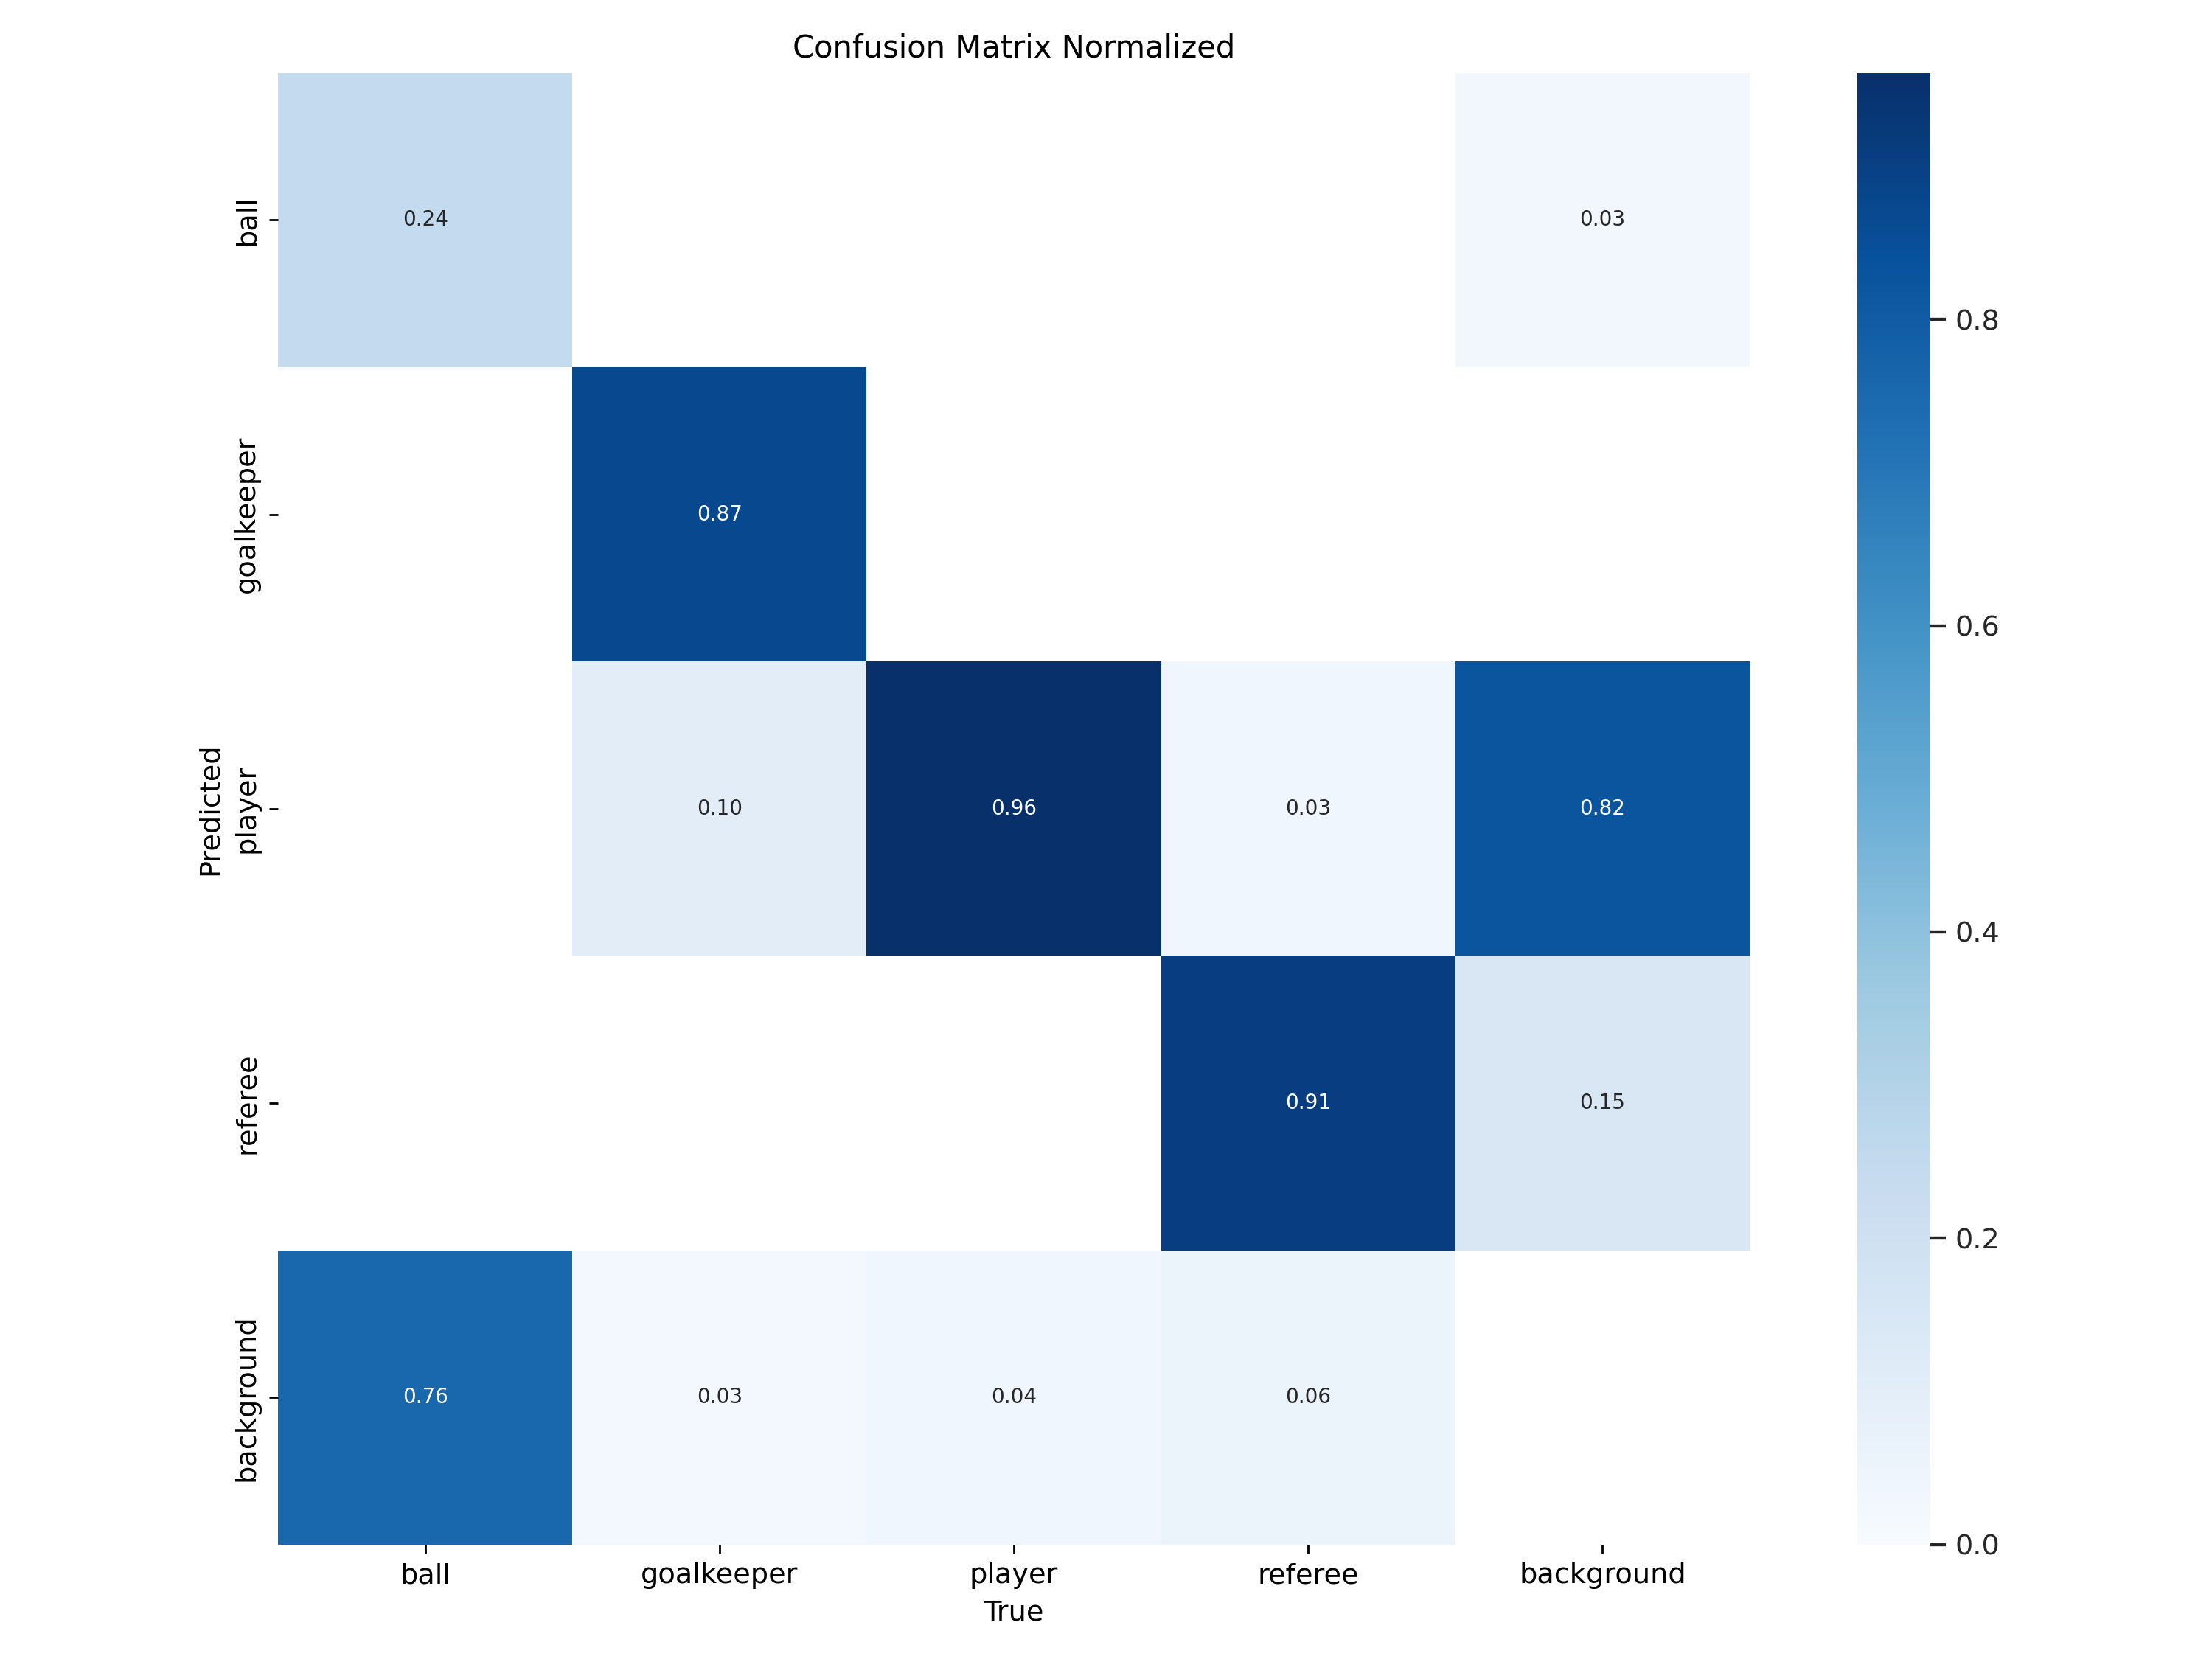

In [55]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix_normalized.png', width=600)

/content


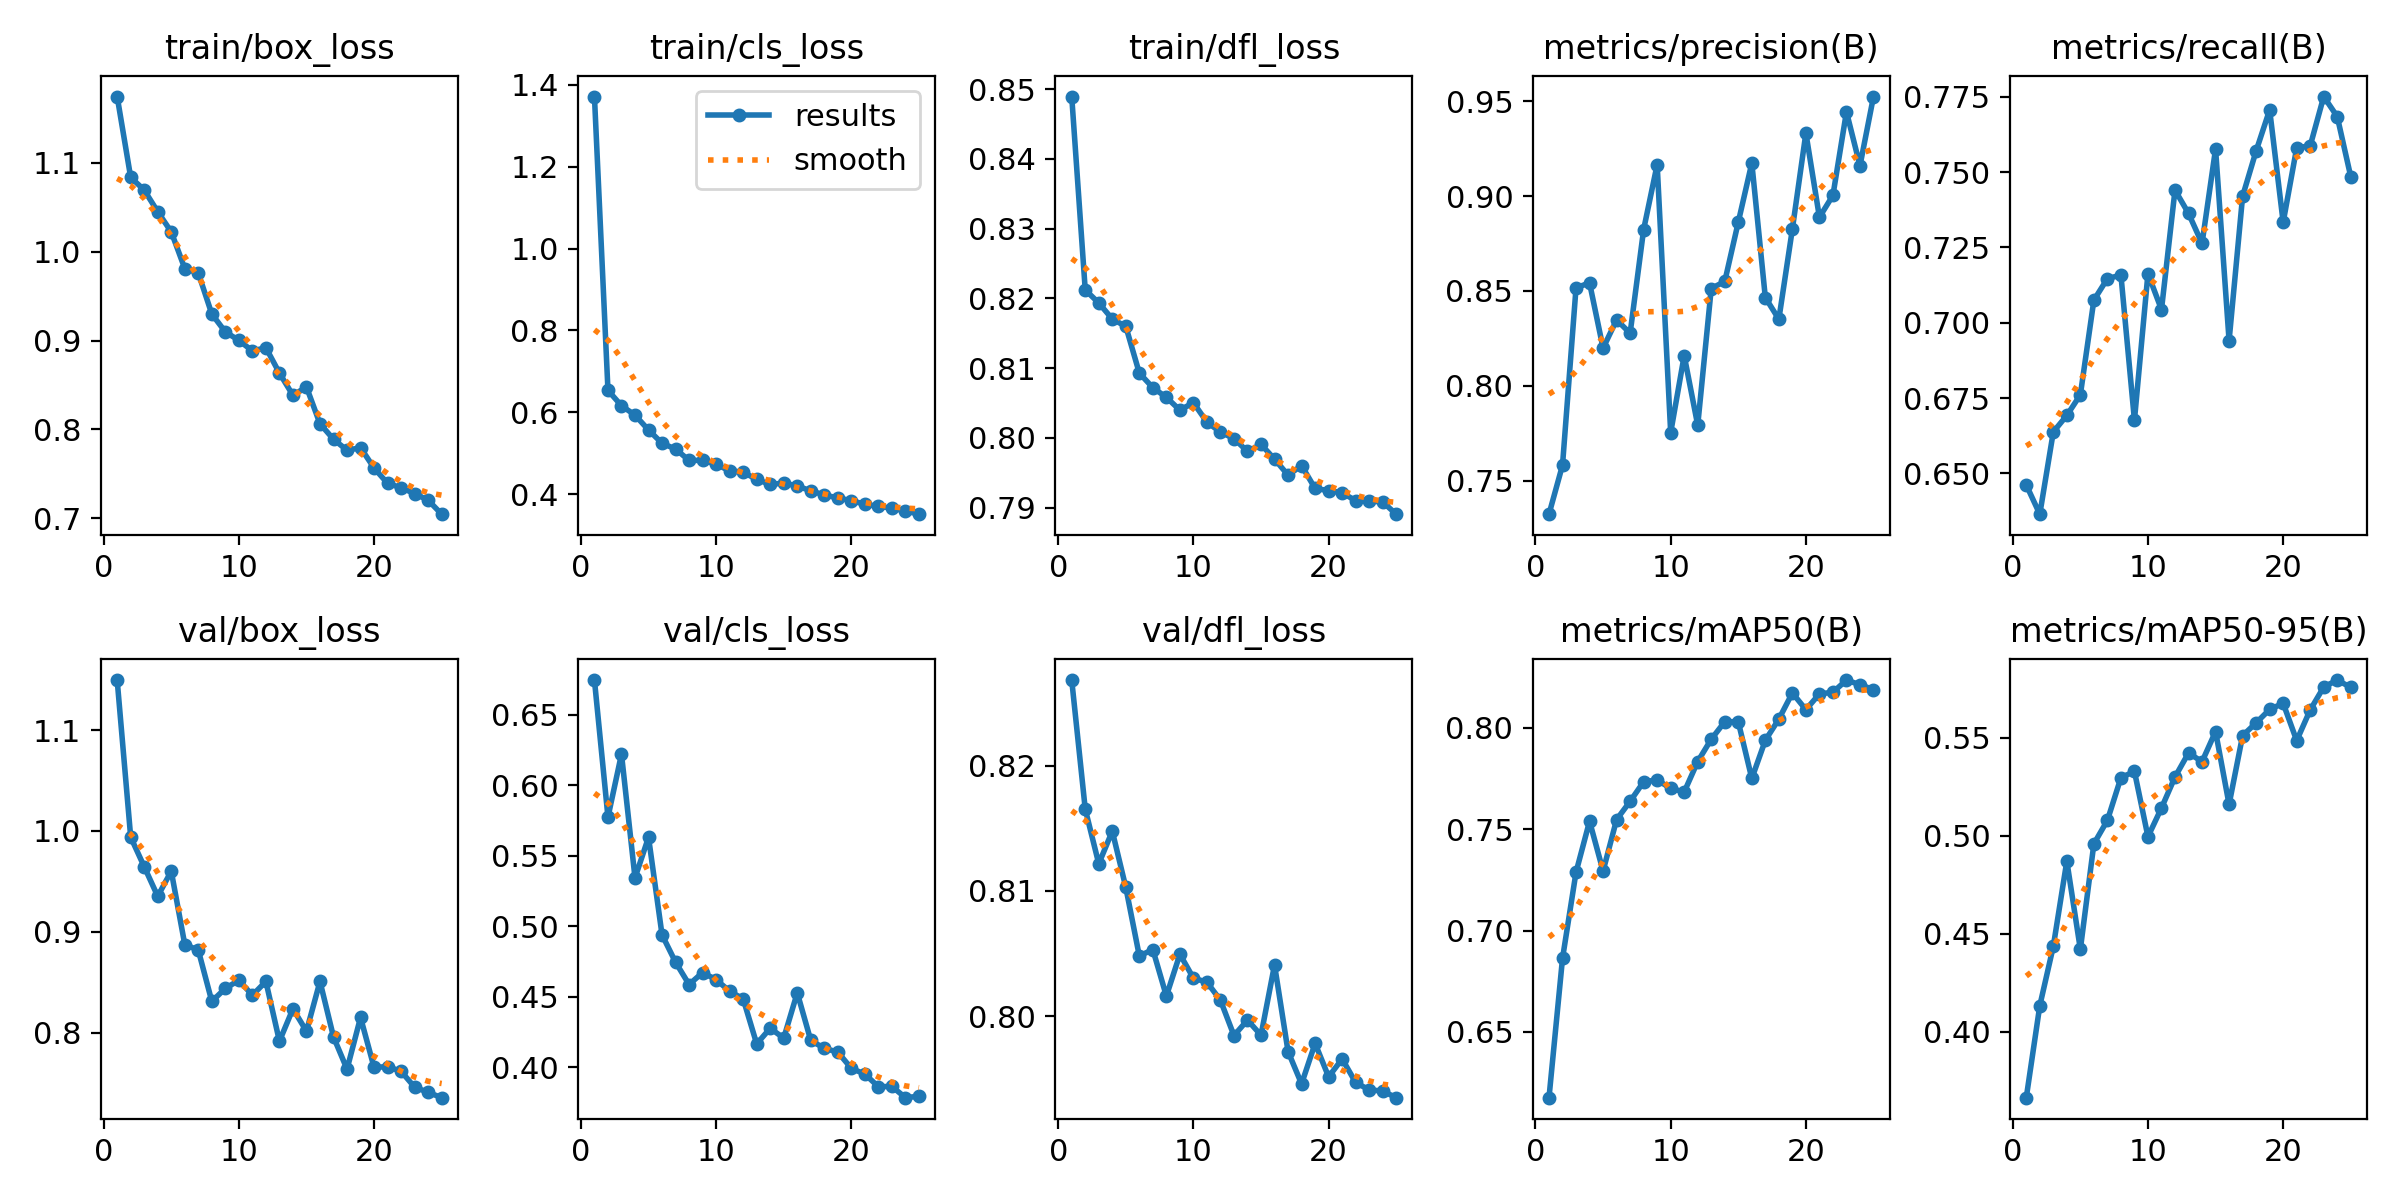

In [56]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/content


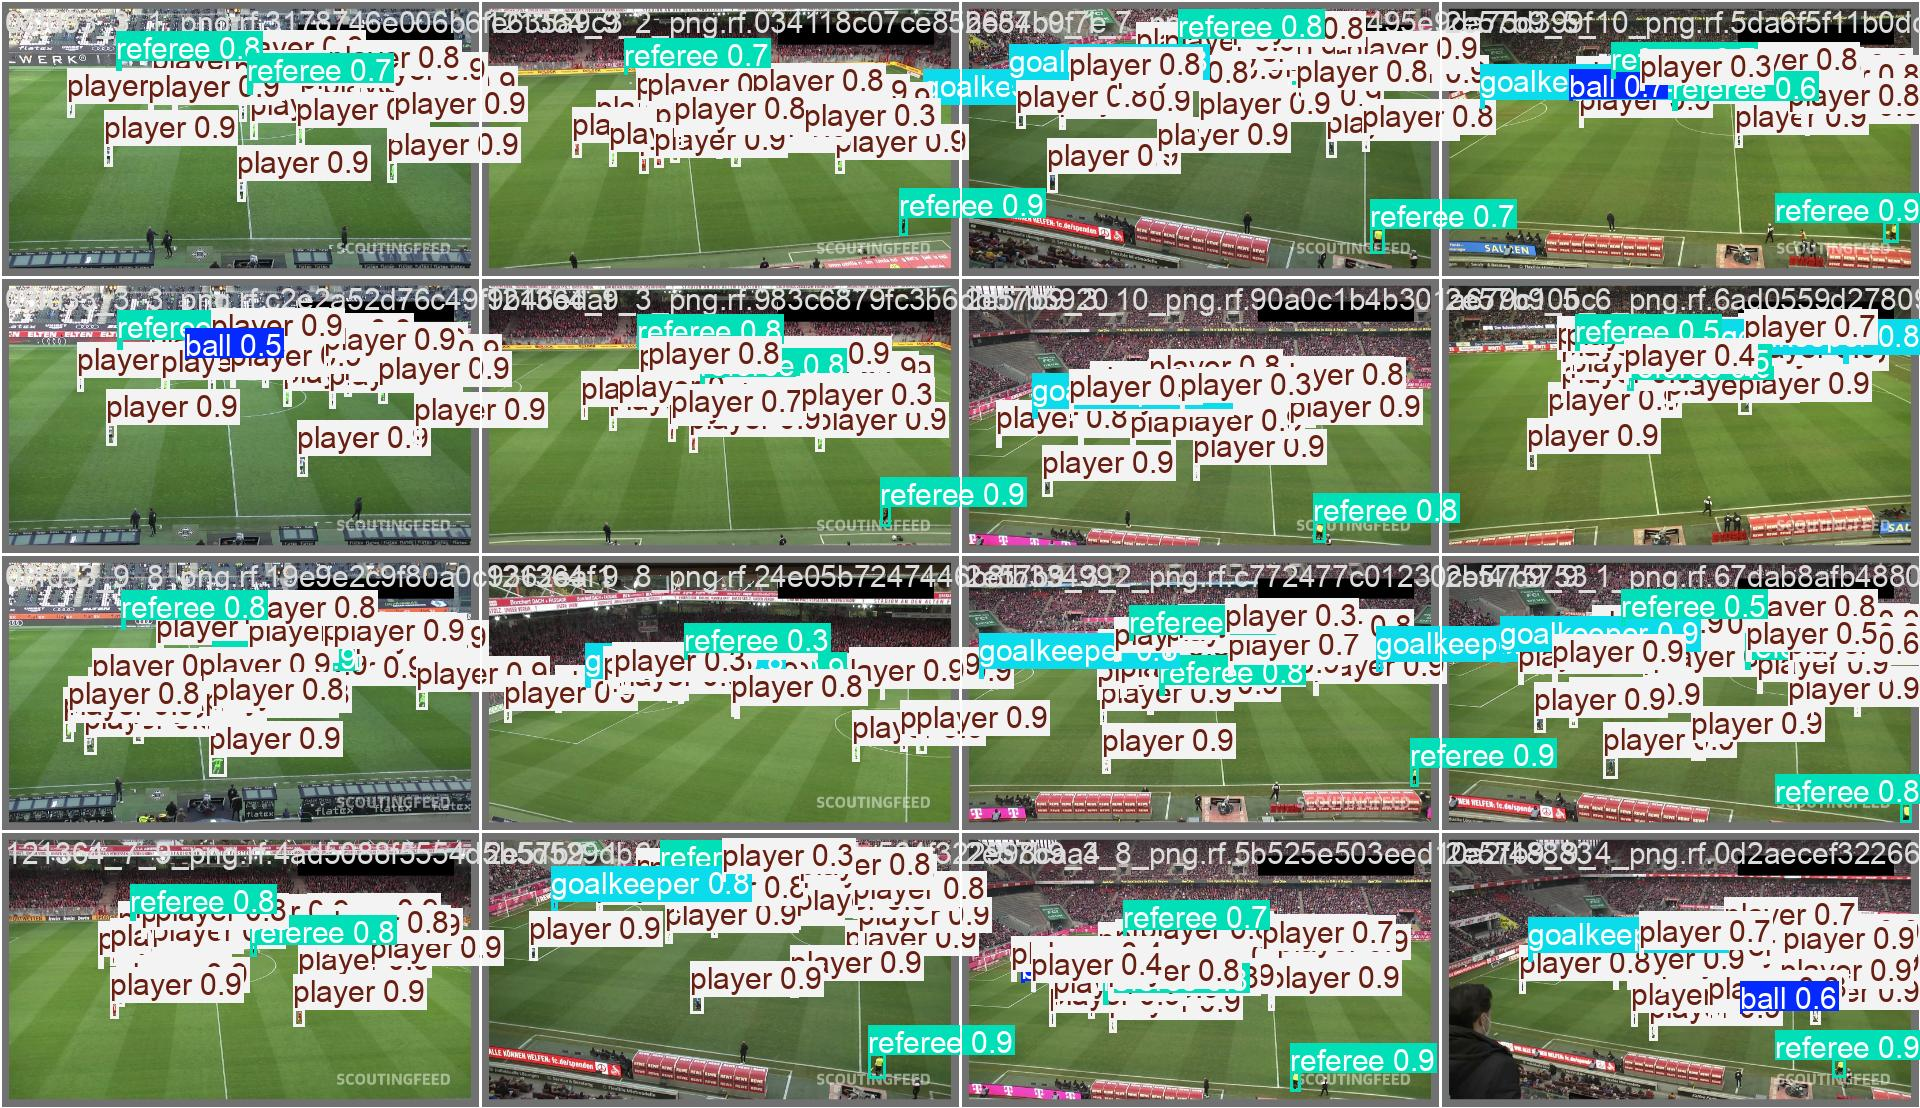

In [57]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

##Validate custom model

In [58]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/football-players-obj-detection-1/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.42s/it]
                   all         49       1174      0.921      0.767      0.822      0.589
                  ball         45         45      0.856      0.264      0.368      0.167
            goalkeeper         38         39      0.891      0.897      0.954      0.703
                player         49        973      0.962      0.962      0.988      0.809
               referee         49        117      0.974      0.946      0.977      0.677
Speed: 1.8ms preprocess, 20.5ms inference, 0.1ms loss, 22.1ms postprocess per image
Results saved to runs

##Inference with custom model

In [59]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/25 /content/datasets/football-players-obj-detection-1/test/images/08fd33_3_6_png.rf.ee274df498bb5faaecda5ccdb1eea3eb.jpg: 480x800 20 players, 2 referees, 40.5ms
image 2/25 /content/datasets/football-players-obj-detection-1/test/images/08fd33_9_3_png.rf.7812b9f81de027d61208dfe8ac8ecf79.jpg: 480x800 20 players, 1 referee, 15.6ms
image 3/25 /content/datasets/football-players-obj-detection-1/test/images/40cd38_7_6_png.rf.01d51b4e36e3d5a043ff80abe3ff534d.jpg: 480x800 1 ball, 20 players, 1 referee, 15.6ms
image 4/25 /content/datasets/football-players-obj-detection-1/test/images/42ba34_1_5_png.rf.df12ca58bef708d102b3cbbf146e077f.jpg: 480x800 1 ball, 1 goalkeeper, 22 players, 2 referees, 15.5ms
image 5/25 /content/datasets/football-players-obj-detection-1/test/images/42ba34_5_5_png.rf.ef1514c270caf5d3f868ec1721389

##Let's look at few results

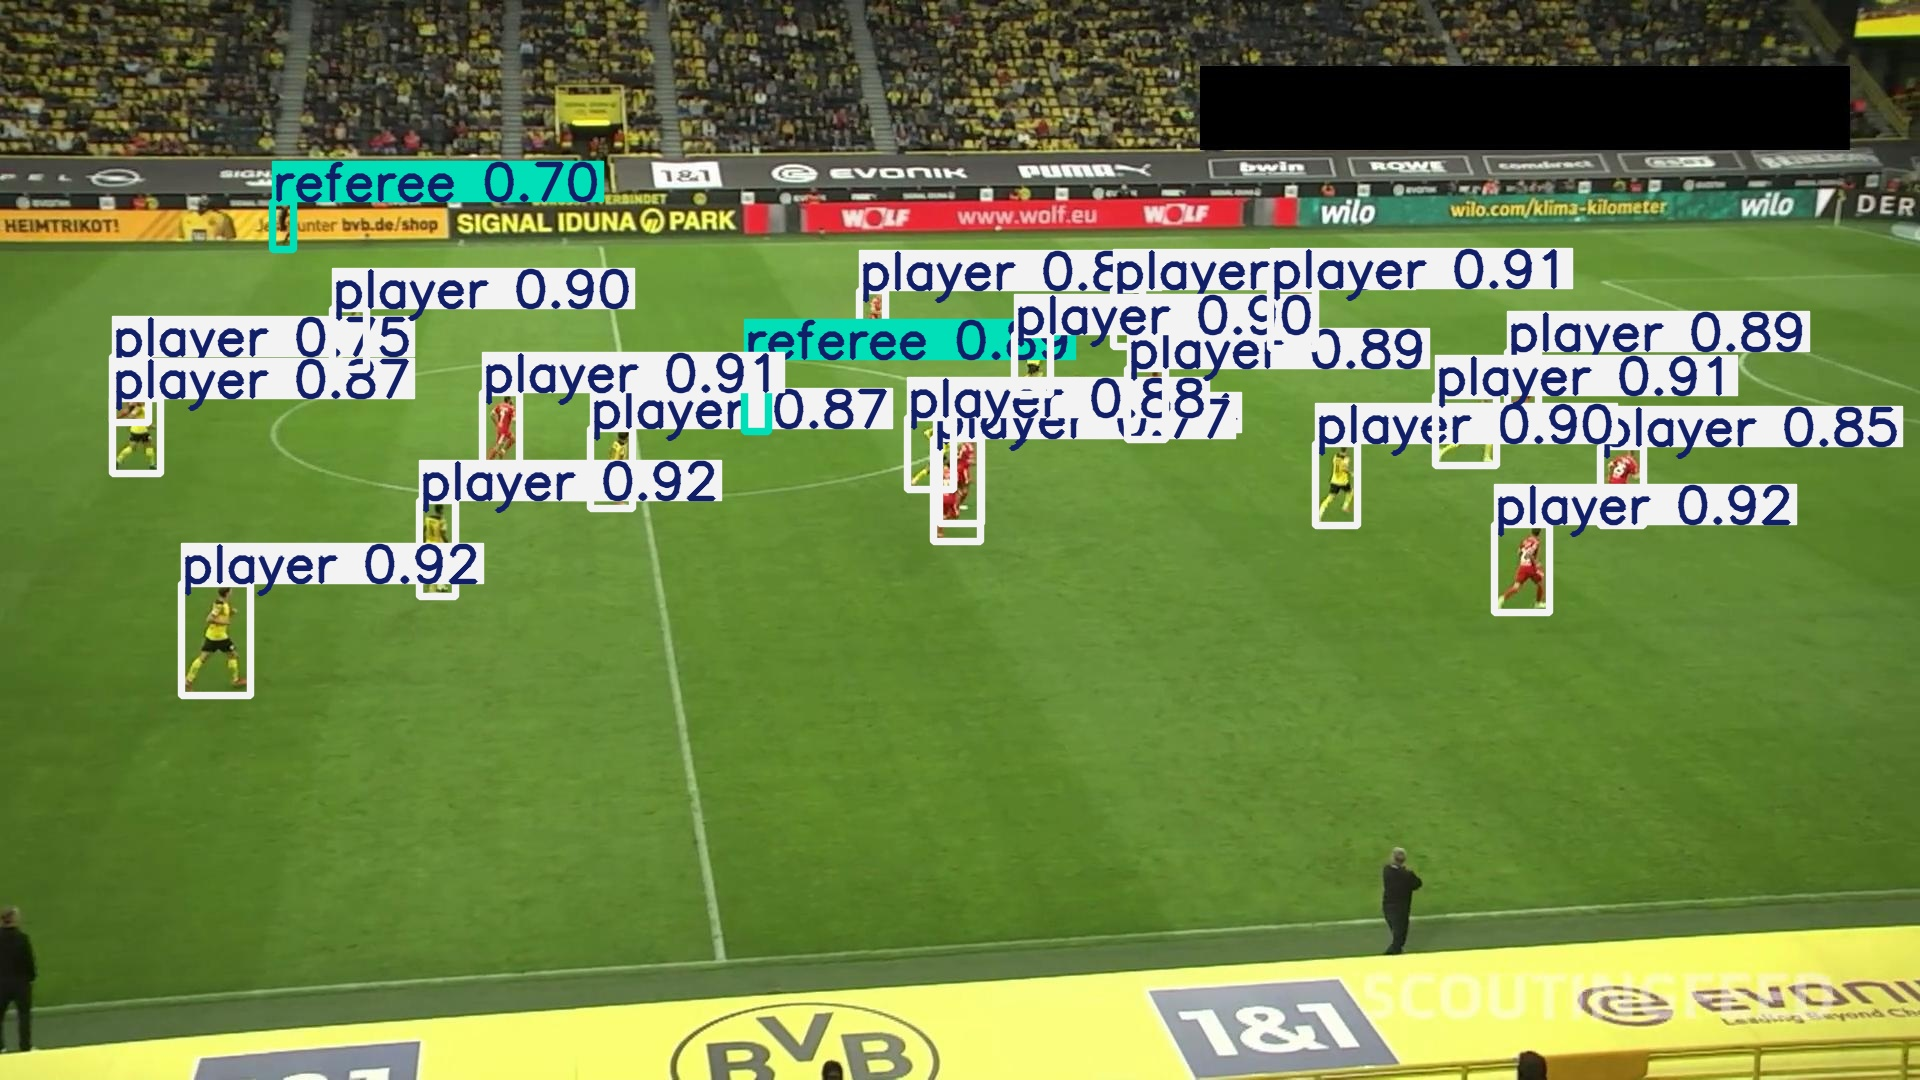

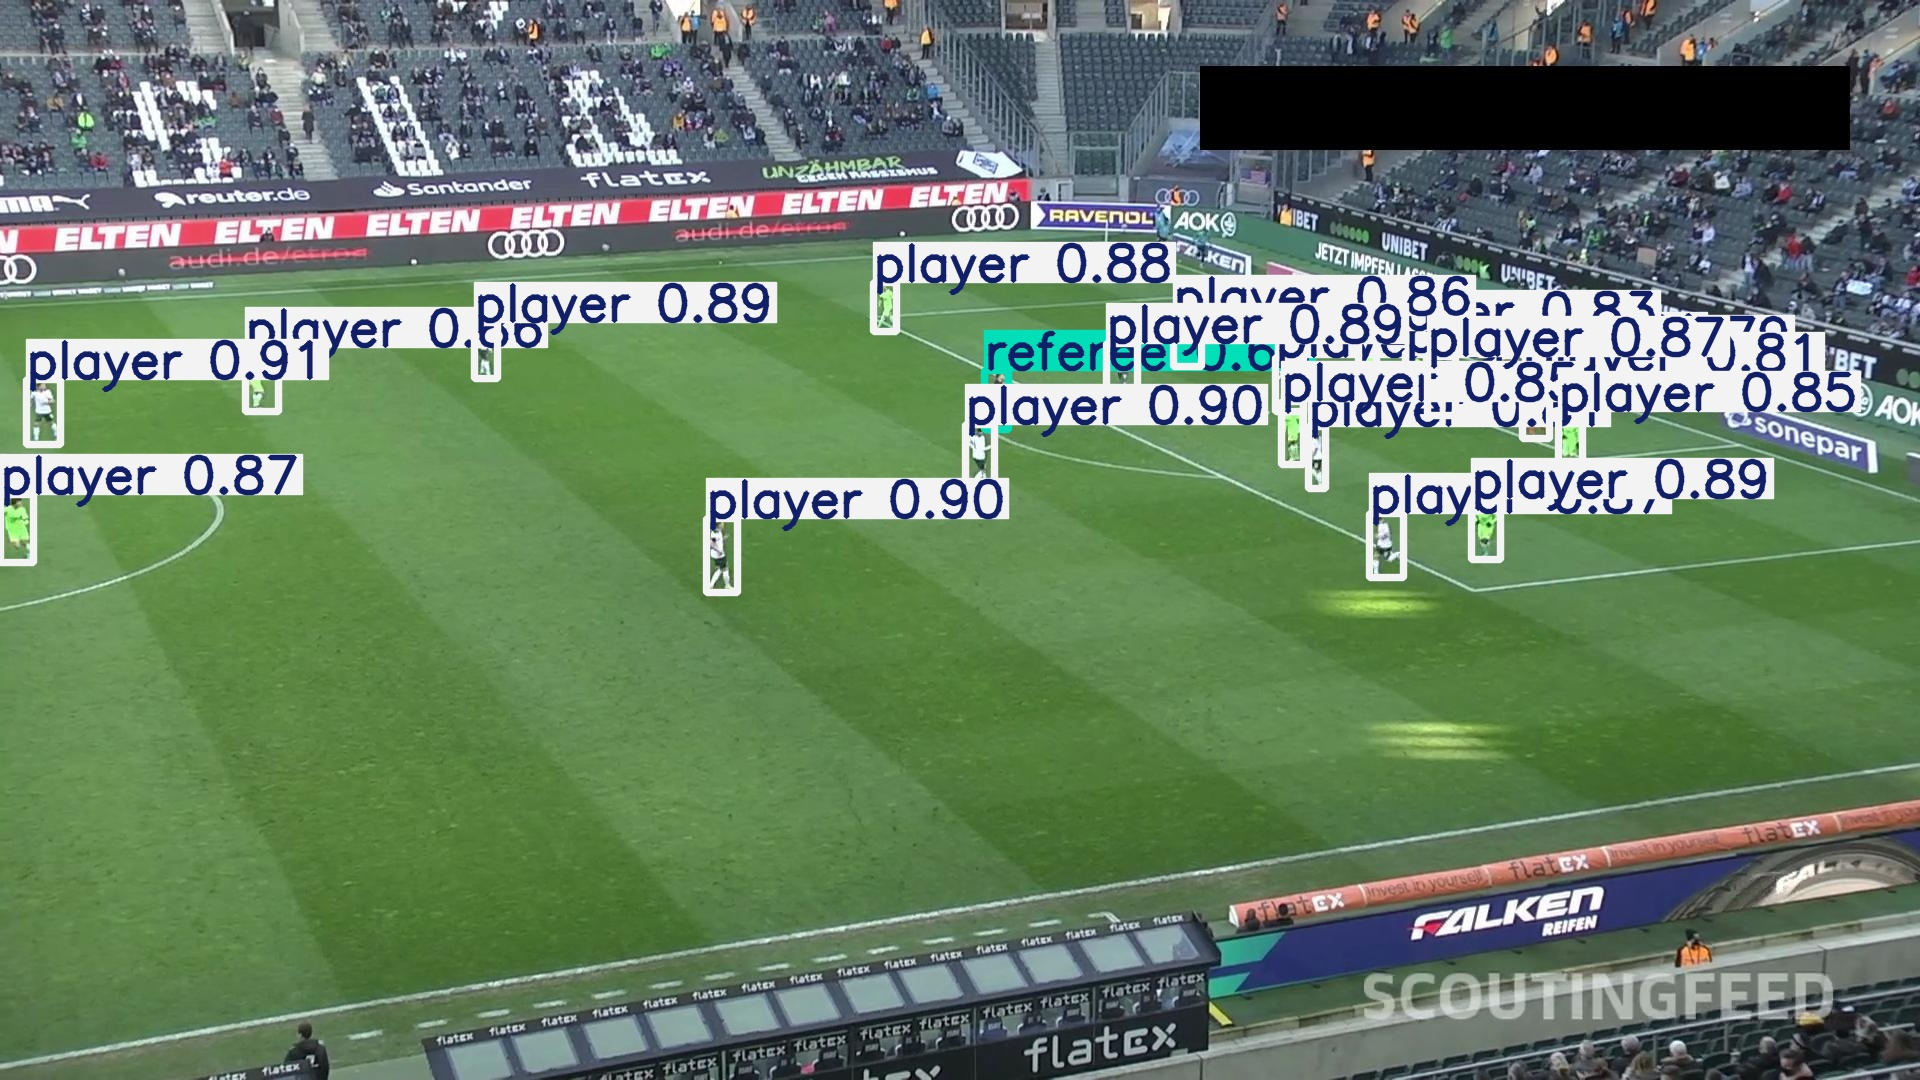

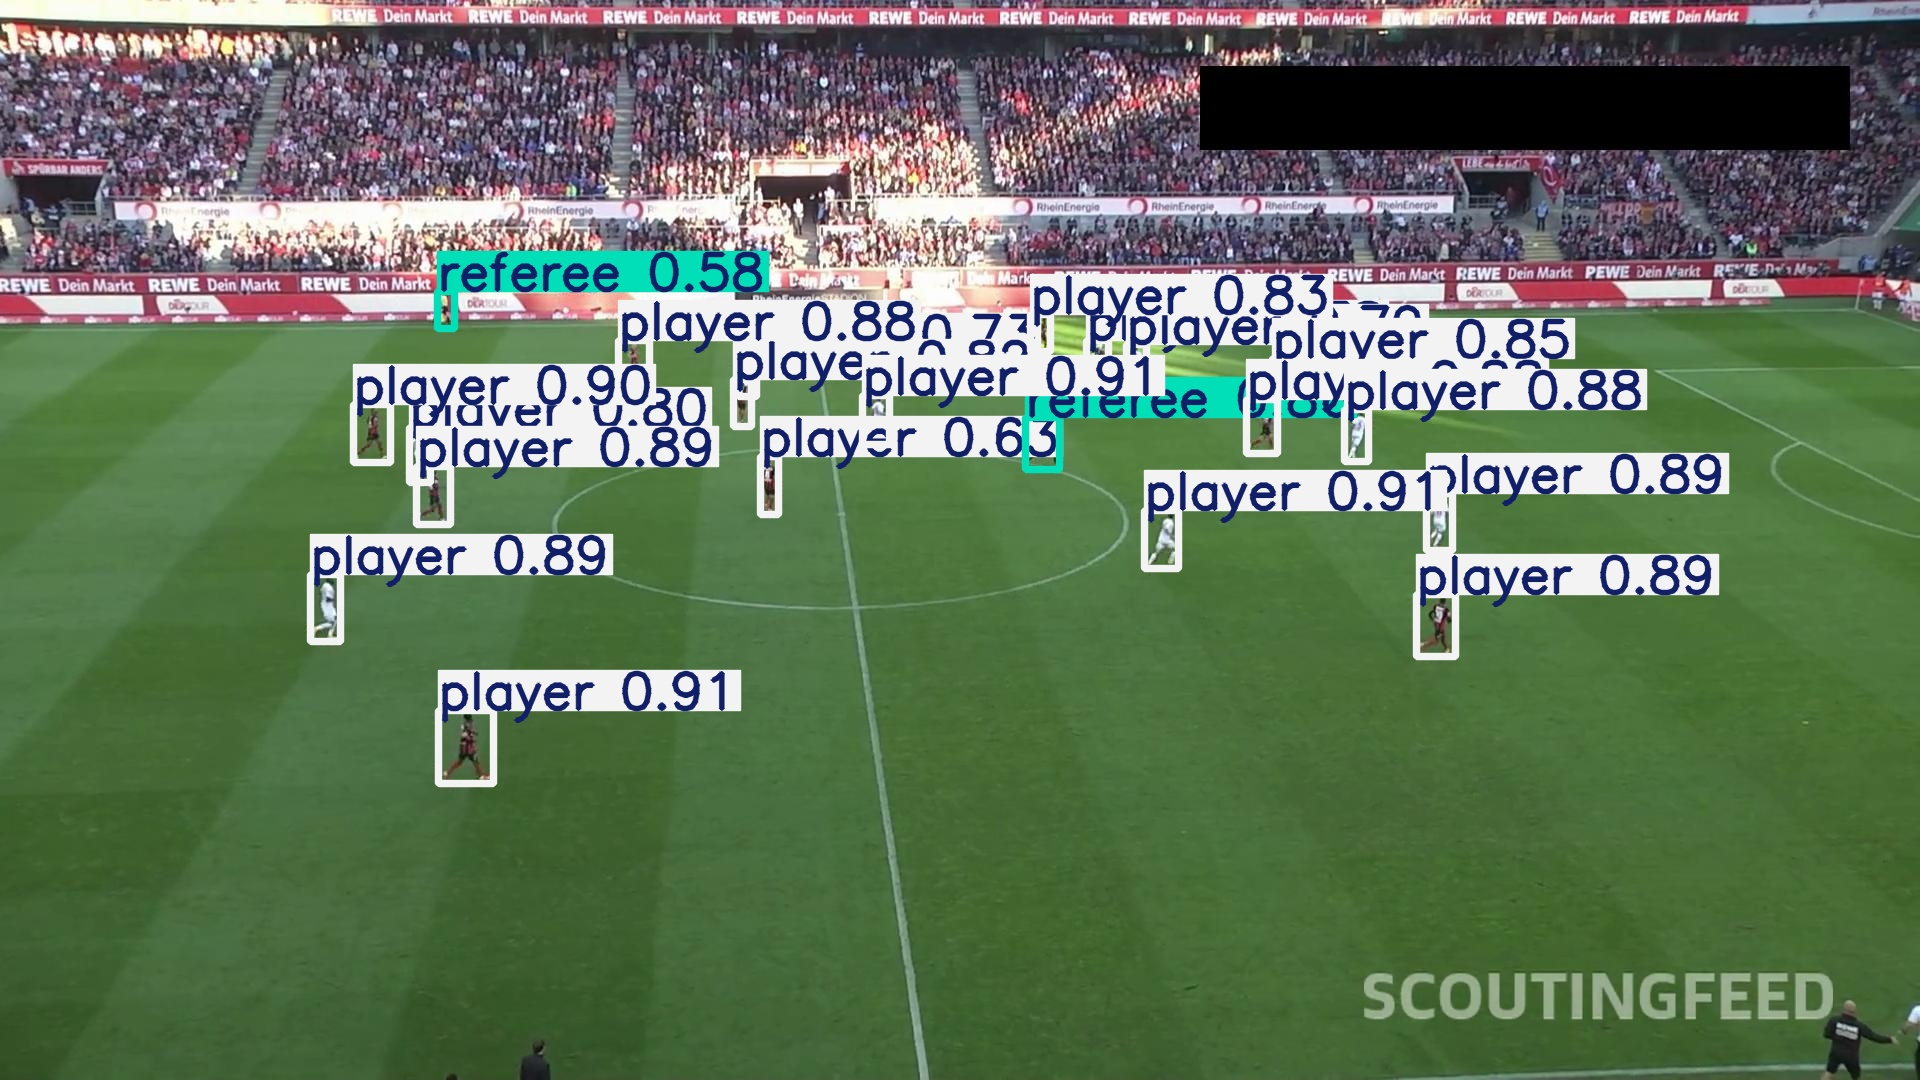

In [69]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict6/*.jpg')[:3]:
  display(Image(filename=image_path, width=600))
  print("\n")

In [61]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source=/content/football_match.mp4

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/942) /content/football_match.mp4: 480x800 1 goalkeeper, 35 players, 39.5ms
video 1/1 (frame 2/942) /content/football_match.mp4: 480x800 1 goalkeeper, 35 players, 15.7ms
video 1/1 (frame 3/942) /content/football_match.mp4: 480x800 1 goalkeeper, 36 players, 15.7ms
video 1/1 (frame 4/942) /content/football_match.mp4: 480x800 2 goalkeepers, 37 players, 15.7ms
video 1/1 (frame 5/942) /content/football_match.mp4: 480x800 1 goalkeeper, 37 players, 15.7ms
video 1/1 (frame 6/942) /content/football_match.mp4: 480x800 1 goalkeeper, 37 players, 15.7ms
video 1/1 (frame 7/942) /content/football_match.mp4: 480x800 2 goalkeepers, 37 players, 15.7ms
video 1/1 (frame 8/942) /content/football_match.mp4: 480x800 2 goalkeepers, 39 players, 15.7ms
video 1/1 (frame 9/942) /content/football_match.mp4: 480x800 2 goalkeepers, 40 

In [62]:
from IPython.display import Video

%cd {HOME}

Video(f'{HOME}/runs/detect/predict7/football_match.avi', width=600)


/content
